In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [5]:
%matplotlib inline

In [6]:
data = pd.read_csv('data/events.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
data['timestamp'].head(2)

0    2018-05-31 23:38:05
1    2018-05-31 23:38:05
Name: timestamp, dtype: object

In [7]:
#Arreglo el tipo de dato de la columna "timestamp"
data["timestamp"] = pd.to_datetime(data["timestamp"])
# separemos las cosas para que quede algo manejable; no tiene sentido tener el timestamp todo junto
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

In [8]:
#Se obtiene el día de la semana, se cuenta y se vuelca en un gráfico
days = {0: "Lunes",1: "Martes",2:"Miercoles",3: "Jueves",4: "Viernes",5: "Sábado",6: "Domingo"}

sorter = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado","Domingo"]
sorterIndex = dict(zip(sorter,range(len(sorter))))

data["weekday"] = data["timestamp"].dt.dayofweek
data["weekday"] = data["weekday"].apply(lambda x: days[x])


# Analizis de los eventos a traves del tiempo

vemos en que horarios se dan los mayores movimientos:

Text(0,0.5,'Cantidad de eventos')

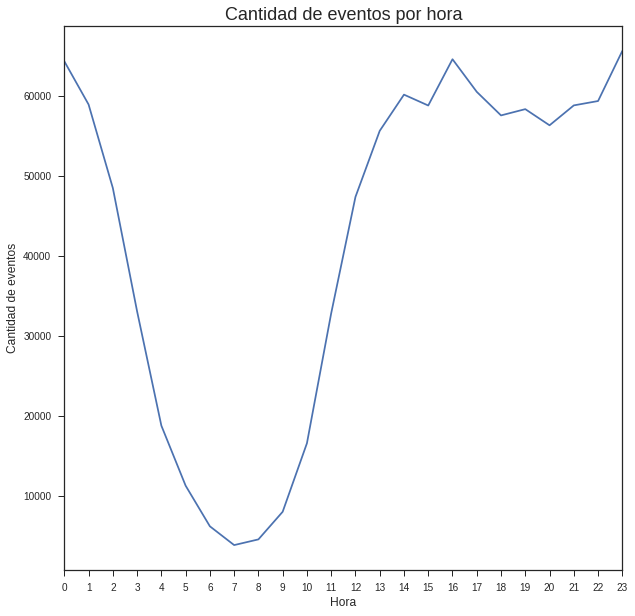

In [23]:
#Se obtiene la hora, se cuenta y se vuelca en un gráfico
grafico1 = data["timestamp"].dt.hour.value_counts().sort_index().plot(figsize=(10,10), xticks=list(range(0,24)))
grafico1.set_title("Cantidad de eventos por hora", fontsize=18)
grafico1.set_xlabel("Hora", fontsize = 12)
grafico1.set_ylabel("Cantidad de eventos", fontsize = 12)


Ahora analizamos para cada evento:

In [25]:
np.unique(data.event)

array(['ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit',
       'searched products', 'staticpage', 'viewed product',
       'visited site'], dtype=object)

In [30]:
data['event'] =data['event'].apply(lambda x: str(x))


In [17]:
data[data.event == 'viewed product']["hour"].value_counts().reset_index(name='cantidad').sort_values(by='index', ascending=True)

,index,cantidad
2,0,33943
4,1,31106
13,2,26410
15,3,18233
17,4,10375
19,5,6371
21,6,3394
23,7,1948
22,8,2319
20,9,3679


Text(0,0.5,'Cantidad de eventos')

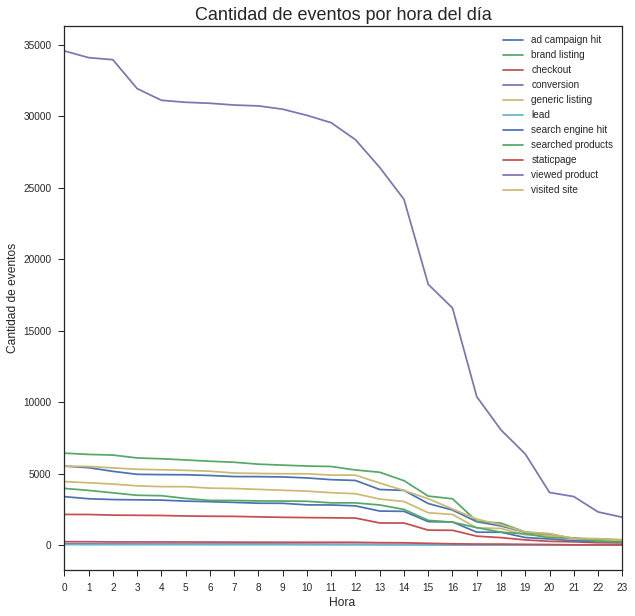

In [28]:
fig = plt.figure(figsize=(20,10))

for event in np.unique(data.event):
    plot = data[data.event == event]["hour"].value_counts().reset_index(name='cantidad')['cantidad'].plot(figsize=(10,10), xticks=list(range(0,24)))
    
plt.legend(("ad campaign hit", "brand listing", "checkout", "conversion",
       "generic listing", "lead", "search engine hit",
       "searched products", "staticpage", "viewed product",
       "visited site"))

plt.title("Cantidad de eventos por hora del día", fontsize=18)
plt.xlabel("Hora ", fontsize = 12)
plt.ylabel("Cantidad de eventos", fontsize = 12)

Vemos que tenemos una baja cantidad de interacciones entre las 17 y las 23 y que la cantidad de eventos por hora es pareja para la mayoria de los eventos a excepcion de viewed product que tiene mucho mas cantidad de eventos y lead y static page que tiene muy poca cantidad de eventos por hora.


Para apreciar mejor los demas eventos vamos a aislar viewed product:

Text(0,0.5,'Cantidad de eventos')

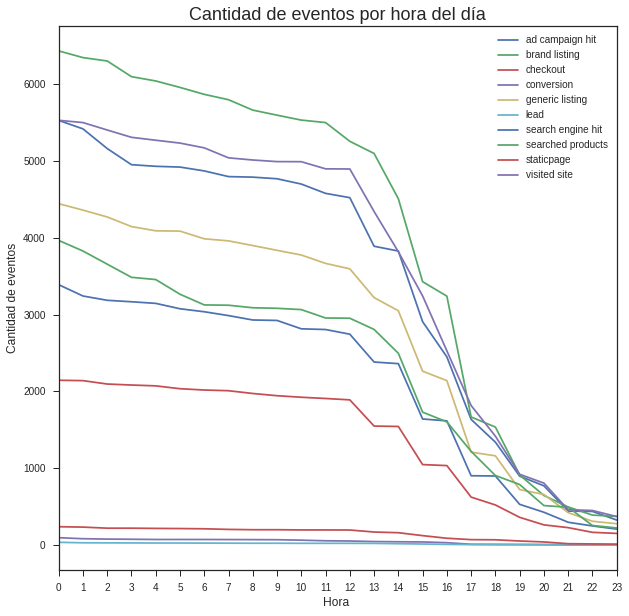

In [29]:
fig = plt.figure(figsize=(20,10))

for event in ["ad campaign hit", "brand listing", "checkout", "conversion","generic listing", "lead", "search engine hit", "searched products", "staticpage","visited site"]:
    plot = data[data.event == event]["hour"].value_counts().reset_index(name='cantidad')['cantidad'].plot(figsize=(10,10), xticks=list(range(0,24)))
    
plt.legend(("ad campaign hit", "brand listing", "checkout", "conversion", "generic listing", "lead", "search engine hit","searched products", "staticpage", "visited site"))

plt.title("Cantidad de eventos por hora del día", fontsize=18)
plt.xlabel("Hora ", fontsize = 12)
plt.ylabel("Cantidad de eventos", fontsize = 12)

Nos concentramos  en detectar en que horarios tenemos los mayores checkouts y conversions

Text(0,0.5,'Cantidad de eventos')

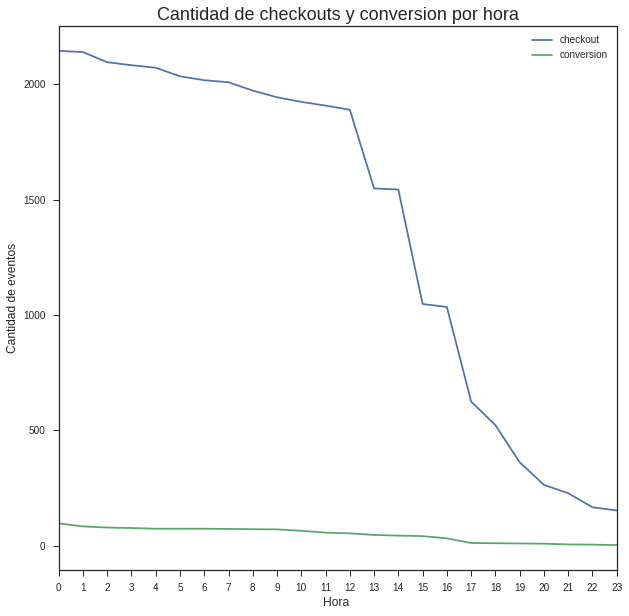

In [30]:
fig = plt.figure(figsize=(20,10))

for event in ["checkout", "conversion"]:
    plot = data[data.event == event]["hour"].value_counts().reset_index(name='cantidad')['cantidad'].plot(figsize=(10,10), xticks=list(range(0,24)))
    
plt.legend(("checkout", "conversion"))

plt.title("Cantidad de checkouts y conversion por hora", fontsize=18)
plt.xlabel("Hora ", fontsize = 12)
plt.ylabel("Cantidad de eventos", fontsize = 12)

In [33]:
event_day = data[['event','weekday']]

In [34]:
dfEventosAgrupado = event_day.groupby("weekday").count()
dfEventosAgrupado

,event
weekday,
Domingo,101709
Jueves,161868
Lunes,149385
Martes,170020
Miercoles,164323
Sábado,114612
Viernes,149371


In [35]:
dfEventosAgrupado["weekday"] = dfEventosAgrupado.index
dfEventosAgrupado["weekday"] = dfEventosAgrupado["weekday"].map(sorterIndex)


Text(0,0.5,'Cantidad de eventos')

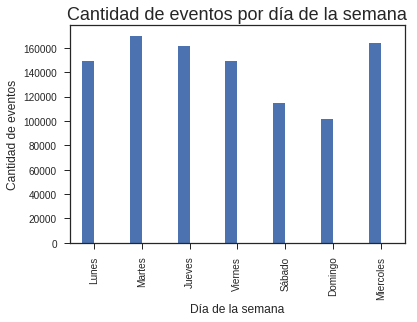

In [36]:
grafico = dfEventosAgrupado.sort_values("weekday").plot(kind = "bar")
grafico.legend_.remove()
grafico.set_title("Cantidad de eventos por día de la semana", fontsize=18)
grafico.set_xlabel("Día de la semana", fontsize=12)
grafico.set_ylabel("Cantidad de eventos", fontsize=12)

Observamos como es el comportamiento de los evento por dia de las semanas, 
para ello reaizamos una visualizacion para ver como es el avance de la cantidad de checkouts y conversion por dia de la semana

Text(0,0.5,'Cantidad de eventos')

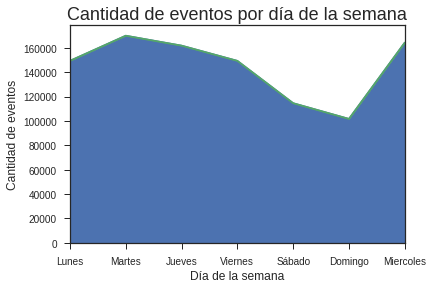

In [37]:
grafico = dfEventosAgrupado.sort_values("weekday").plot(kind = "area")
grafico.legend_.remove()
grafico.set_title("Cantidad de eventos por día de la semana", fontsize=18)
grafico.set_xlabel("Día de la semana", fontsize=12)
grafico.set_ylabel("Cantidad de eventos", fontsize=12)

In [73]:
day_event = pd.crosstab(data.weekday, data.event).reindex(weekdaysIndex)

In [74]:
day_event

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
weekday,,,,,,,,,,,
Lunes,11902,15067,4621,184,10236,90,7696,8184,658,77653,13094
Martes,13757,15997,5928,215,11037,64,8653,8741,724,90410,14494
Miercoles,13357,16202,5772,189,11012,75,8110,8776,574,86051,14205
Jueves,13130,16340,5559,200,10603,60,7646,8551,599,85396,13784
Viernes,12395,14731,5244,175,9761,64,7331,8328,464,77947,12931
Sábado,9493,11053,3474,106,7615,45,5871,6586,265,60313,9791
Domingo,8793,9245,3137,103,7270,50,5650,6907,314,51161,9079


Text(0,0.5,'Cantidad de eventos')

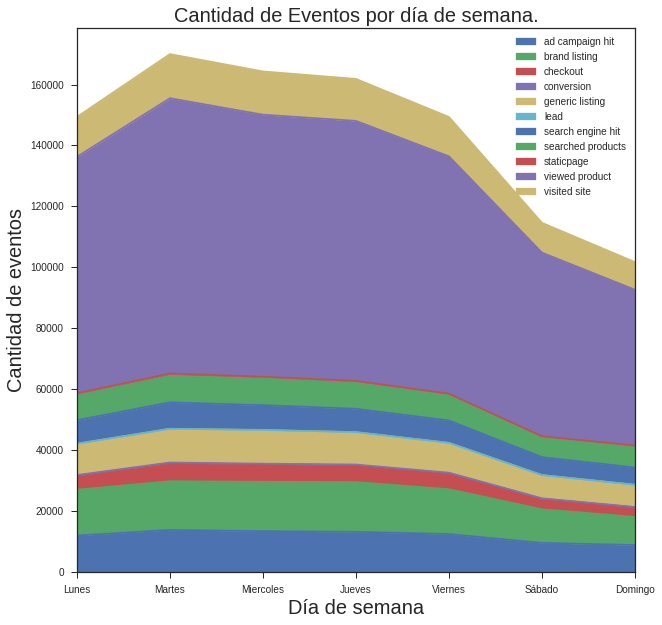

In [75]:

day_event.plot(kind='area',figsize=(10,10))
plt.legend(fontsize=10)
plt.title("Cantidad de Eventos por día de semana.",fontsize=20)
plt.xlabel("Día de semana",fontsize=20)
plt.ylabel("Cantidad de eventos",fontsize=20)

# Cantidad de conversiones según día de la semana y hora

In [89]:
eventos_conversion['weekday'] = eventos_conversion['weekday'].map(sorterIndex)

/home/july/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
eventos_conversion.head(2)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,device_type,screen_resolution,operating_system_version,browser_version,dia_semana,year,month,day,hour,weekday
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,Lunes,2018,3,20,17,Lunes
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,Miércoles,2018,4,26,22,Miércoles


In [106]:
table.head(2)

weekday,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes
hour,,,,,,,
0,6.0,12.0,14.0,6.0,6.0,4.0,6.0
1,5.0,16.0,10.0,18.0,6.0,4.0,6.0


In [71]:
weekdaysIndex = ['Lunes', 'Martes', 'Miercoles','Jueves','Viernes','Sábado','Domingo']


In [110]:
table = eventos_conversion.pivot_table(index = 'hour', columns = 'weekday', values = 'day', aggfunc = 'count').reindex(columns=weekdaysIndex)
tabletable = eventos_conversion.pivot_table(index = 'hour', columns = 'weekday', values = 'day', aggfunc = 'count')
table


weekday,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo
hour,,,,,,,
0,14.0,6.0,6.0,12.0,6.0,4.0,6.0
1,10.0,18.0,6.0,16.0,6.0,4.0,5.0
2,13.0,4.0,9.0,4.0,6.0,6.0,5.0
3,12.0,6.0,4.0,7.0,8.0,3.0,4.0
4,1.0,3.0,1.0,3.0,3.0,1.0,NaN
5,NaN,2.0,1.0,2.0,1.0,3.0,2.0
6,2.0,1.0,1.0,NaN,1.0,NaN,NaN
7,2.0,NaN,1.0,NaN,NaN,NaN,NaN
8,1.0,1.0,1.0,1.0,NaN,1.0,1.0


Text(27,0.5,'Hora del día')

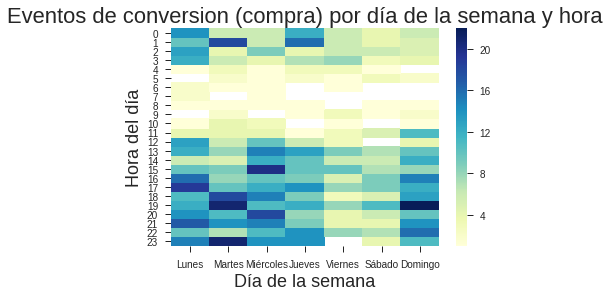

In [111]:
g = sns.heatmap(table,  cmap="YlGnBu")
g.set_title("Eventos de conversion (compra) por día de la semana y hora", fontsize=22)
g.set_xlabel("Día de la semana",fontsize=18)
g.set_ylabel("Hora del día", fontsize=18)

# Análisis con el evento 'check-out'

In [114]:
eventos_check_out = data.loc[data.event == 'checkout']
eventos_check_out.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,device_type,screen_resolution,operating_system_version,browser_version,dia_semana,year,month,day,hour,weekday
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,Miércoles,2018,5,31,23,Miércoles
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,Lunes,2018,5,29,13,Lunes
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,12660,Motorola Moto Z Play,Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,Miércoles,2018,5,24,11,Miércoles
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,6355,Samsung Galaxy J5,Excelente,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,Jueves,2018,4,6,5,Jueves
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,6355,Samsung Galaxy J5,Excelente,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,Jueves,2018,4,6,5,Jueves


# Checkouts según día de la semana y hora

In [117]:
table = eventos_check_out.pivot_table(index = 'hour', columns = 'weekday', values = 'day', aggfunc = 'count').reindex(columns=weekdaysIndex)
table

weekday,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo
hour,,,,,,,
0,373,326,333,333,266,186,218
1,359,338,327,295,238,186,181
2,296,231,271,233,192,162,164
3,181,175,159,179,145,123,86
4,101,102,103,107,72,80,60
5,64,49,47,47,61,50,44
6,31,41,38,46,21,27,24
7,27,17,25,25,19,24,16
8,25,30,27,23,19,28,15


Text(27,0.5,'Hora del día')

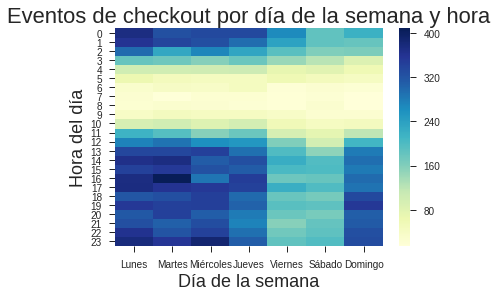

In [118]:
g = sns.heatmap(table,  cmap="YlGnBu")
g.set_title("Eventos de checkout por día de la semana y hora", fontsize=22)
g.set_xlabel("Día de la semana",fontsize=18)
g.set_ylabel("Hora del día", fontsize=18)

In [76]:
dayevent = data[['event','day']]

In [91]:
checkconv = dayevent[(dayevent['event']=='conversion')|(dayevent['event']=='checkout')]

In [77]:
event_day_cant = dayevent.groupby('day').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [78]:
event_day_cant.head()

index  cantidad
day                             
1   0   viewed product     16405
    1     visited site      2694
    2  ad campaign hit      2623
    3    brand listing      2596
    4  generic listing      2068

In [79]:
event_day_cant= event_day_cant.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventos estudiados por día')

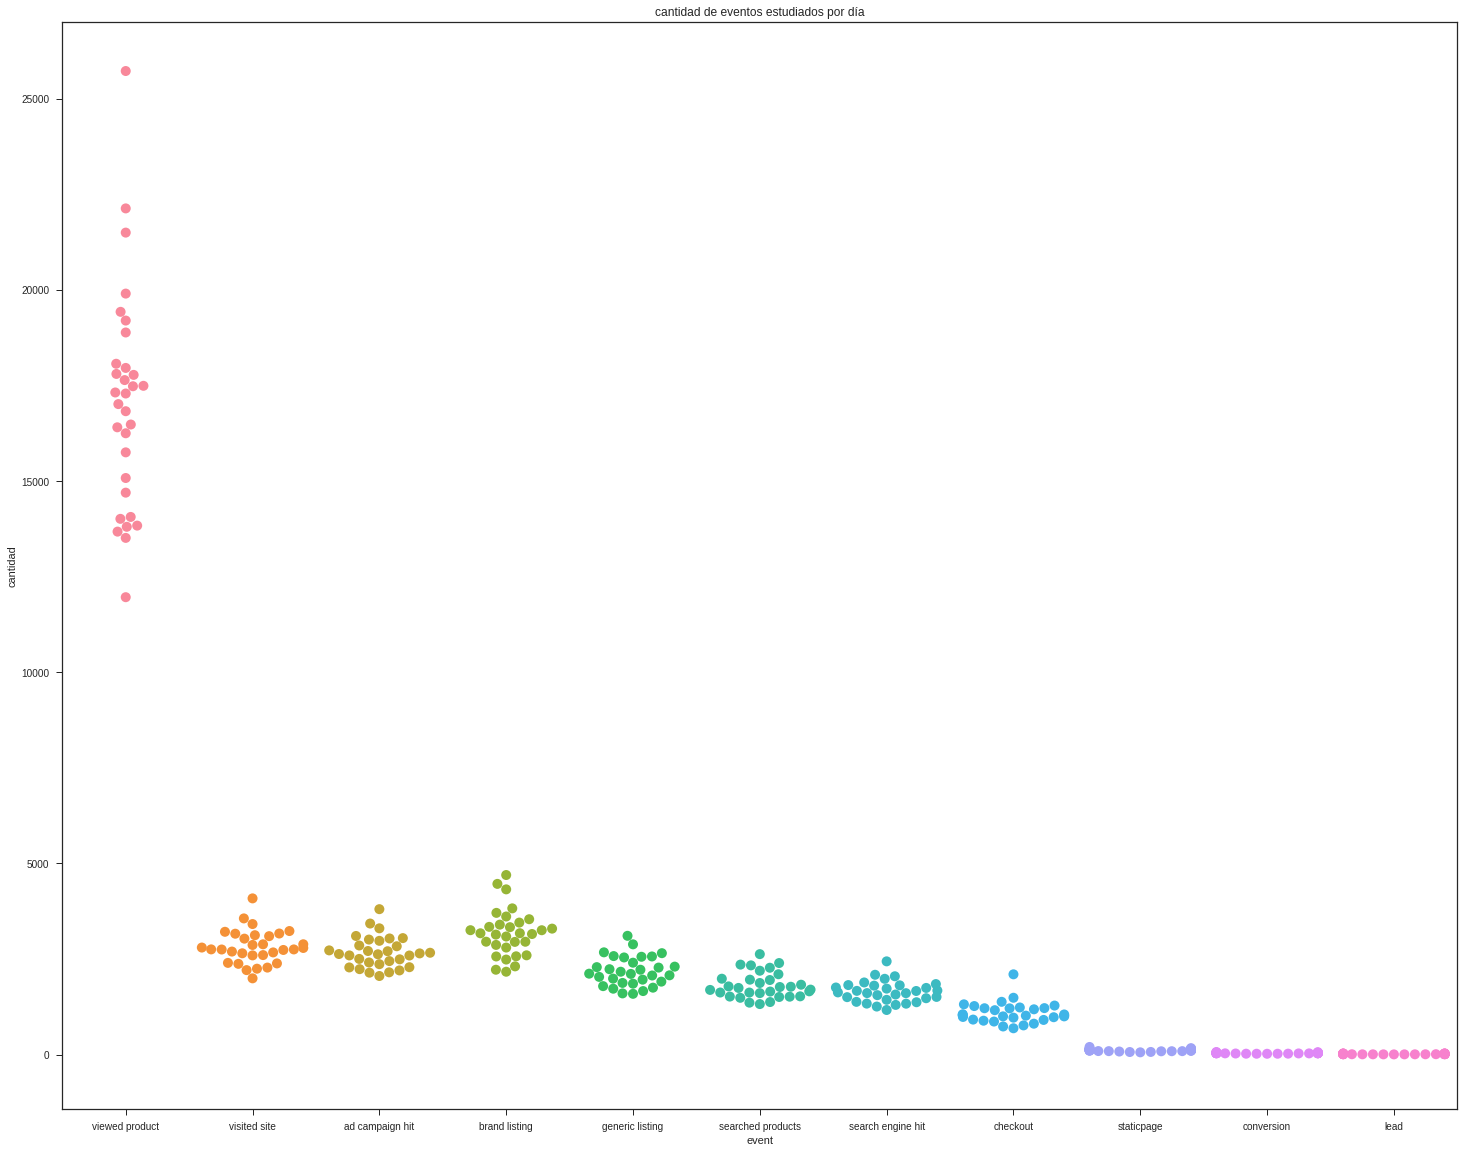

In [87]:
plt.figure(figsize=(25,20))
sns.swarmplot(x="event", y="cantidad", size=10, data=event_day_cant).set_title('cantidad de eventos estudiados por día')

In [102]:
event_day = dayevent.groupby('day').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [103]:
event_day= event_day.rename(columns={'index':'event'})

Text(0.5,1,'cantidad de eventos estudiados por día')

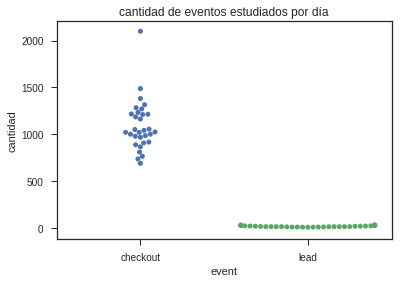

In [105]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='checkout')|(event_day['event']=='lead')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

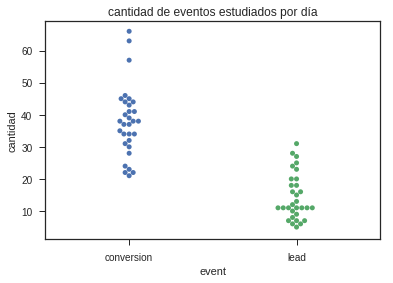

In [106]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='conversion')|(event_day['event']=='lead')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

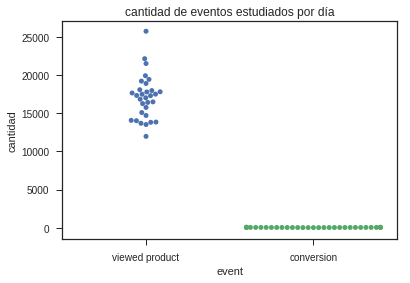

In [110]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='conversion')|(event_day['event']=='viewed product')]).set_title('cantidad de eventos estudiados por día')

Text(0.5,1,'cantidad de eventos estudiados por día')

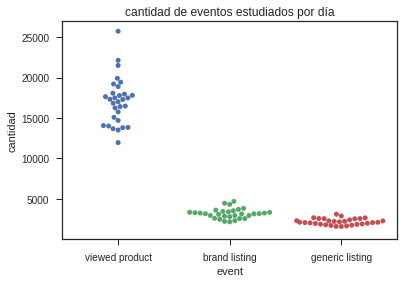

In [111]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='generic listing')|(event_day['event']=='brand listing')|(event_day['event']=='viewed product')]).set_title('cantidad de eventos estudiados por día')

In [124]:
sns.swarmplot(x="event", y="cantidad", data=event_day[(event_day['event']=='visited site')|(event_day['event']=='ad campaign hit')|(event_day['event']=='search engine hit')]).set_title('cantidad de eventos estudiados por día')

ValueError: Could not interpret input 'cantidad'

In [122]:
data.groupby('weekday')['event'].count()

weekday
Domingo      149385
Jueves       149371
Lunes        170020
Martes       164323
Miércoles    161868
Sábado       101709
Viernes      114612
Name: event, dtype: int64

In [113]:
data.condition.value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [116]:
condition_event = data[['condition','event']]

In [117]:
event_condition = condition_event.groupby('condition').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [119]:
event_condition=event_condition.rename(columns={'index':'event'})

In [120]:
event_condition.head(2)

event  cantidad
condition                            
Bom       0  viewed product    227171
          1        checkout     15305

In [ ]:
sns.boxplot

Text(0.5,1,'cantidad de eventos estudiados por condición')

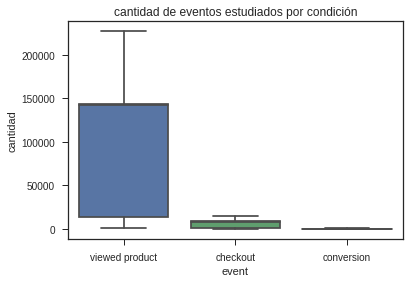

In [124]:
sns.boxplot(x="event", y="cantidad", data=event_condition).set_title('cantidad de eventos estudiados por condición')

In [115]:
data.storage.value_counts()

16GB     190833
32GB     184455
64GB     100024
128GB     40805
8GB       38181
256GB      6821
4GB        2152
512MB       565
Name: storage, dtype: int64

In [125]:
event_storage = data[['storage','event']]

In [126]:
event_storage = event_storage.groupby('storage').apply(lambda x: x['event'].value_counts().reset_index(name='cantidad'))

In [128]:
event_storage = event_storage.rename(columns={'index':'event'})

In [ ]:
sns.violinplot()

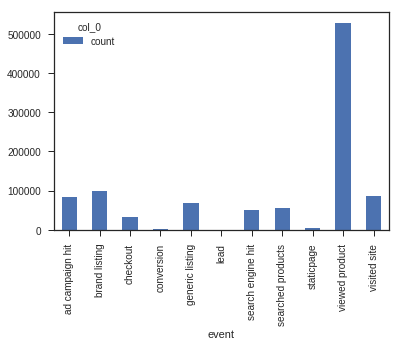

In [134]:
my_tab = pd.crosstab(index = data["event"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [88]:
from statsmodels.graphics.mosaicplot import mosaic



In [138]:
data.columns


Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [21]:
data.browser_version.value_counts().head()

Chrome 66.0           22611
Chrome Mobile 66.0    17513
Chrome 65.0            6635
Chrome Mobile 65.0     5665
Chrome Mobile 64.0     3083
Name: browser_version, dtype: int64

In [26]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'dia_semana'],
      dtype='object')

In [32]:
data.campaign_source.value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

In [31]:
data.condition.value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [96]:
df = data[(data['event']=='conversion')|(data['event']=='checkout')]

<Figure size 3600x3600 with 0 Axes>

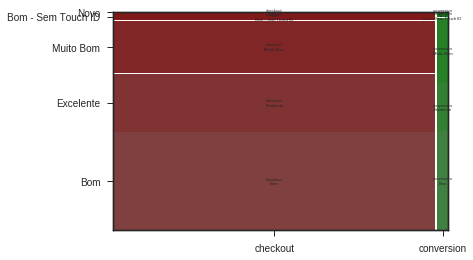

In [98]:
plt.figure(figsize=(50,50))
plt.rcParams['font.size'] = 5
mosaic(df, [ 'event','condition']);

In [100]:
data.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64